<a href="https://colab.research.google.com/github/bharat1611/OCR_Handwritten_Digit_Recog/blob/master/Ocr_Handwritten_Digit_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
x, y = mnist['data'], mnist['target']

In [5]:
# x is 70000 rows of data, y is the value that is formed by the pixels in x

In [6]:
x.info()
x.head()
x.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


(70000, 784)

In [7]:
y.info()
y.head()
y.shape

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


(70000,)

In [8]:
# y consists of numbers from 0 to 9, basically the numbers we have to identify

In [9]:
%matplotlib inline

In [10]:
row = 36001
some_digit = x.iloc[row].values
some_digit_image = some_digit.reshape(28,28)

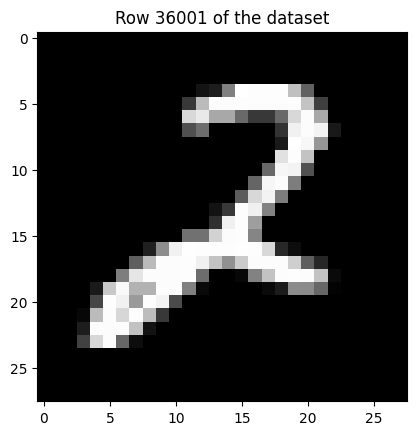

'2'

In [11]:
plt.imshow(some_digit_image, cmap = 'gray')
plt.title(f"Row {row} of the dataset")
plt.show()
y[row]

'2'

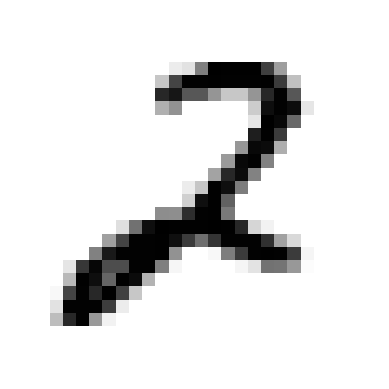

In [12]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis('off')
y[row]

In [13]:
# MNIST dataset is already divided into training and testing phases
# first 60000 is training, next 10000 is testing

In [14]:
x_train, x_test = x[0:60000], x[60000:]
y_train, y_test = y[0:60000], y[60000:]

In [15]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [16]:
# For better model accuracy, we shuffle the dataset
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

#**Creating a 2 detector**

In [26]:
# creating a 2 detector, if number is 2, gives true, otherwise false
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [27]:
y_train

array([5, 6, 9, ..., 9, 1, 4], dtype=int8)

In [28]:
print(y_train_2)
print(y_test_2)

[False False False ... False False False]
[False  True False ... False False False]


In [29]:
# classifier
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression(tol = 0.1)
#specify solver = "lbfgs"

In [34]:
clf.fit(x_train, y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [35]:
clf.predict([some_digit])
#some digit was 2, printed above

array([ True])

In [43]:
print(clf.predict([x.iloc[3400].values]))
print(y[3400])

[False]
3


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

In [40]:
a.mean()

0.9783333333333334